In [3]:
from os.path import join

import rasterio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
base_path = '/opt/data/datasets/detection/'
tiff_path = join(base_path, 'tc_ng_sfbay_us_geotiff/TC_NG_SFBay_US_Geo.tif')
dataset = rasterio.open(tiff_path)
image = dataset.read()
image = np.transpose(image, [1, 2, 0])

In [61]:
# highest point of nub on top of SF using EPSG:4326
nub_spatial = (-122.474899, 37.807388)

# convert point to (row, col) index
nub_index = dataset.index(nub_spatial[0], nub_spatial[1])
print(nub_index)

# do the inverse transform: (row, col) to spatial coords
# note: ul was renamed to xy in more recent versions of rasterio
inferred_nub_spatial = dataset.ul(nub_index[0], nub_index[1])
print(inferred_nub_spatial)

(1764, 1757)
(-122.47492041711466, 37.807387941927)


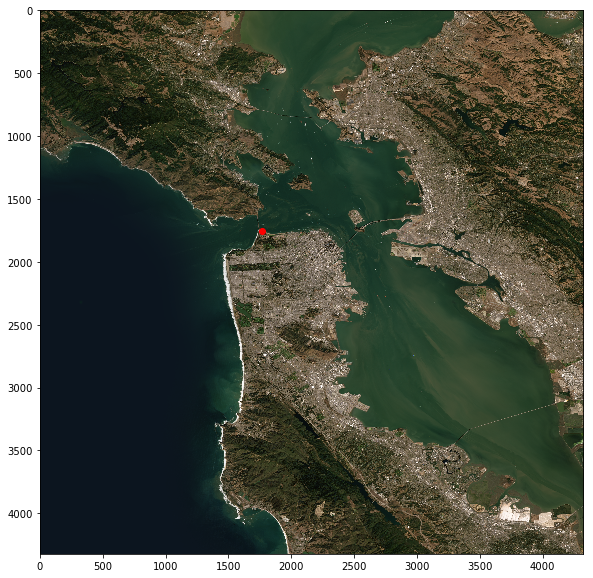

In [63]:
# plot the nub
plt.figure(figsize=(10, 10))
plt.scatter([nub_index[0]], [nub_index[1]], color='red')
plt.imshow(image)